In [24]:
!cp drive/My Drive/Colab Notebooks/Untitled.ipynb ./

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


This notebook was made by Wassim Lakehal and Théo Rouvet. We start by importing relevant packages.

In [0]:
import numpy as np
from random import sample
import matplotlib.pyplot as plt

## **Exercise 1**

We consider a data set $ \{x_i, y_i \}_{i=1}^{300}$ so that $y_i$ is uniformly generated on $\{0,1,2\}$, $x_i \sim N(\mu, \sigma^2I)$ , with $\sigma^2=0.05$ and $x_i \in \mathbb{R}^2$, where:
* $\mu = (-1,1)$, if $y_i=0$
* $\mu = (1,1)$, if $y_i=1$
* $\mu = (0,1)$, if $y_i=2$

### **Question 1**

We first implement a generating function for this data set.

In [0]:
def generator(sigma2 = 0.05, n = 300): # Let us generate the dataset

  X = np.zeros((n,2))
  y = np.zeros(n)

  range_generated = np.arange(n)

  for i in range_generated[:n//3] :
    x = np.sqrt(sigma2) * np.random.randn(2)

    x[0] -= 1 # 
    x[1] += 1 # We center in (-1, 1)
    X[i] = x
    y[i] = 0

  for i in range_generated[n//3:2*n//3] :
    x = np.sqrt(sigma2) * np.random.randn(2)

    x[0] += 1 # 
    x[1] += 1 # We center in (1,1)
    X[i] = x
    y[i] = 1

  for i in range_generated[2*n//3:]:
    x = np.sqrt(sigma2) * np.random.randn(2)

    x[0] += 0 #
    x[1] += 1 # We center in (0,1)
    X[i] = x
    y[i] = 2
  
  return X, y 

After doing so, we wish to implement $k$-means, with $k=3$ and the centroids being initialised each in a different gaussian.

In [0]:
def three_means(X, epsilon=10**(-3)):
  n, p = X.shape
  
  r1, r2, r3 = np.random.randint(0, n//3), np.random.randint(n//3, 2*n//3), np.random.randint(2*n//3, n) # random index in each set
  C = [X[r1], X[r2], X[r3]] # the centroids are random elements of each set
  C = np.asarray(C)
  cost = 0
  previous_cost = epsilon + 1
  while abs(previous_cost - cost) > epsilon:
    X_clusters = [[], [], []]

    previous_cost = cost
    cost = 0

    for x in X:
      index = np.argmin(np.linalg.norm(x - C, 2, axis=-1)**2)
      X_clusters[index].append(x)

    for i in range(len(X_clusters)):
      cluster_array = np.array(X_clusters[i])
      C[i] = np.mean(cluster_array, axis = 0)
      cost += np.linalg.norm(cluster_array - C[i], 2)**2

    return X_clusters, C

We can then plot the resulting clustering thanks to $k$-means.

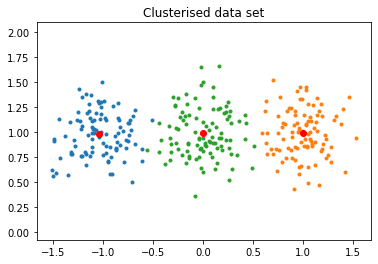

In [0]:
X, _ = generator()
X_clusters, C = three_means(X, epsilon = 10**(-5))

plt.figure()
for i in range(len(X_clusters)):
  cluster = np.asarray(X_clusters[i])
  plt.scatter(cluster[:,0], cluster[:,1], marker = '.')
  plt.scatter(C[i][0], C[i][1], c='red', marker='o')
plt.axis('equal')
plt.title("Clusterised data set")
plt.show()

The clustering seems quite good so far, which is not surprising giving that we initialised in an advantageous way.

### **Question 2**

We then want to plot the associated **cost function**, and study its convergence for a certain stopping criterion, defined by a precision threshold $\epsilon$.

In [0]:
def cost_three_means(X, epsilon=1e-5):
  n, p = X.shape
  
  r1, r2, r3 = np.random.randint(0, n//3), np.random.randint(n//3, 2*n//3), np.random.randint(2*n//3, n) # random index in each set
  C = [X[r1], X[r2], X[r3]] # the centroids are random elements of each set
  C = np.asarray(C)

  cost = 0
  previous_cost = epsilon + 1
  cost_list = []

  while abs(previous_cost - cost) > epsilon:
    X_clusters = [[], [], []]

    previous_cost = cost
    cost = 0

    for x in X:
      index = np.argmin(np.linalg.norm(x - C, 2, axis=-1)**2)
      X_clusters[index].append(x)

    for i in range(len(X_clusters)):
      cluster_array = np.array(X_clusters[i])
      C[i] = np.mean(cluster_array, axis = 0)
      cost += np.linalg.norm(cluster_array - C[i], 2)**2

    cost_list.append(cost)

  return cost_list

We can then again plot this function to get a quick look at its shape.

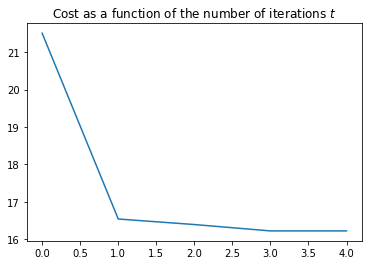

In [0]:
X, _ = generator()
cost_list = cost_three_means(X, epsilon = 10**(-7))
plt.plot(cost_list)
plt.title("Cost as a function of the number of iterations $t$")
plt.show()

After having done so, we wish to understand the **distribution of the number of iterations until convergence**. We then plot the histogram of the $T$'s.

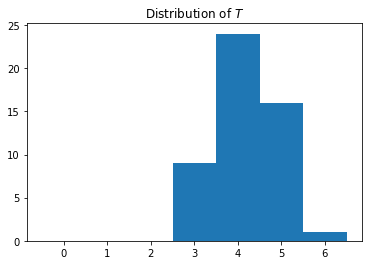

In [0]:
nb_tests = 50
iterations = np.zeros(nb_tests)

for i in range(nb_tests):
  cost_list = cost_three_means(X, epsilon = 10**(-3))
  iterations[i] = len(cost_list)

bins = np.arange(0, np.max(iterations) + 1.5) - 0.5
plt.hist(iterations, bins)
plt.title("Distribution of $T$")
plt.show()

The value of $T$ seems to be **between $2$ and $6$ almost every time**. We can see that its distribution has some form of Gaussian shape, with very **low dispersion**. This suggests the algorithm produces similar results at a similar speed so far, making it extremely stable.

It would then be interesting to remove the constraint on the initialisation of the centroids, to check whether this is still true. This is what we will find out in the next question.

### **Question 3**

We now initialise the centroids in a perfectly random fashion (just making sure we do not pick the same point multiple times).

In [0]:
def cost_three_means(X, epsilon=1e-6):
  n, p = X.shape
  
  [r1, r2, r3] = sample(range(n),3) # random index in each set
  C = [X[r1], X[r2], X[r3]] # the centroids are random elements of each set

  C = np.asarray(C)

  cost = 0
  previous_cost = epsilon + 1
  cost_list = []

  while abs(previous_cost - cost) > epsilon:
    X_clusters = [[], [], []]

    previous_cost = cost
    cost = 0

    for x in X:
      index = np.argmin(np.linalg.norm(x - C, 2, axis=-1)**2)
      X_clusters[index].append(x)

    for i in range(len(X_clusters)):
      cluster_array = np.array(X_clusters[i])

      C[i] = np.mean(cluster_array, axis = 0)

      cost += np.linalg.norm(cluster_array - C[i], 2)**2
    
    cost_list.append(cost)

  return X_clusters, cost_list, C

We want to plot the associated **cost function**, and study its convergence for a certain stopping criterion, defined by a precision threshold $\epsilon$.

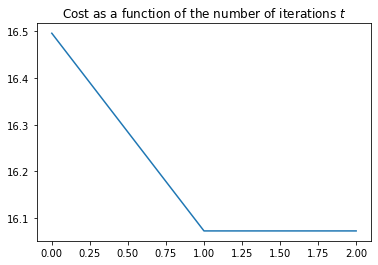

In [0]:
plt.plot(cost_list)
plt.title("Cost as a function of the number of iterations $t$")
plt.show()

We now wish to plot the number of iterations until convergence with this new data set, and compare it with the former result.

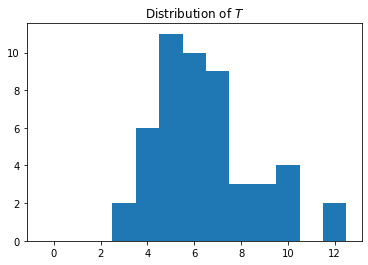

In [0]:
nb_tests = 50
iterations = np.zeros(nb_tests)

for j in range(nb_tests):
  X, _ = generator()
  X_clusters, cost_list, C = cost_three_means(X, epsilon = 10**(-6))
  iterations[j] = len(cost_list)
bins = np.arange(0, np.max(iterations) + 1.5) - 0.5
plt.hist(iterations, bins)
plt.title("Distribution of $T$")
plt.show()

The distribution seem to have more dispersion than before, hence we can deduce that **initialisation has a strong impact on the value of $T$** (which makes sense).

### **Question 4**

We now consider $\sigma^2 \in \{0.1, 0.2, 0.3\}$ for the data set generation, and we rerun the $k$-means on the new data sets (that have more dispersion, which may lead the gaussians to **overlap**, creating confusion).

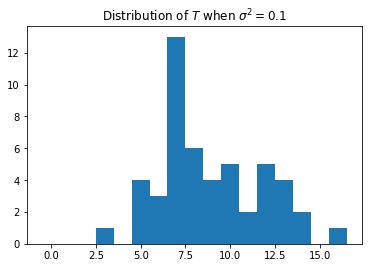

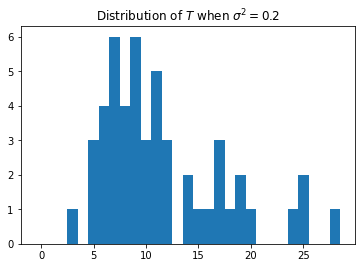

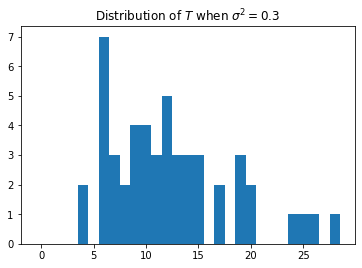

In [0]:
sigma = [0.1, 0.2, 0.3]

for s in sigma:
  nb_tests = 50
  iterations = np.zeros(nb_tests)
  plt.title("Distribution of $T$ when $\sigma^2 =$" + str(s))
  for j in range(nb_tests):
    X, _ =  generator(s, n = 300)
    X_clusters, cost_list, C = cost_three_means(X, epsilon = 10**(-6))
    iterations[j] = len(cost_list)
  bins = np.arange(0, np.max(iterations) + 1.5) - 0.5
  plt.hist(iterations, bins)
  plt.show()

Therefore, it is clear enough that higher standard deviation means overlapping hence leading to more dispersion in the distribution of $T$. The algorithm is therefore sensitive to both **initialisation and dispersion of the data set**.

### **Question 5**

Let $c$ be the cost function such that $c(y) = \sum_{k=1}^K c_k(y_k)$ where $c_k(y) = \sum_{i \in \mathcal{C}_k} ||x_i-y_k||^2_2$ and $y = (y_1, y_2, ..., y_n) \in \mathbb{R}^n$ is the $K$-tuple of the $K$ centroids.

Let's now show that when we $c$ is minimized over $\mathbb{R}^n$, then $\forall k, y_k = \mu_k$

So, first, let's suppose that $c$ is minimized over $\mathbb{R}^n$. We can see that $c$ is differentiable as the sum of $K$ differentiable functions and:

$\nabla c(y) = \sum_{k=1}^K \nabla c_k(y_k) = \sum_{k=1}^K \sum_{i \in \mathcal{C}_k}  2 (y_k-x_i) = 2 \sum_{k=1}^K (y_k \cdot |\mathcal{C}_k| - \sum_{i \in \mathcal{C}_k}  x_i)$

As $c$ is minimized, $\nabla c(y) = 0$, i.e. $\sum_{k=1}^K (y_k \cdot |\mathcal{C}_k| - \sum_{i \in \mathcal{C}_k}  x_i) = 0$ 

But, by taking $y$ as the $K$-tuple of the means of the clusters, i.e. $\forall k, y_k=\frac{\sum_{i \in \mathcal{C}_k}  x_i}{|\mathcal{C}_k|}$, we get $\nabla c(y) = 0$; this is a local minimum of $c$.

Yet, we know that $c$ is a continue and convex function as it is the sum of $K$ continue and convex functions. Thus, a local minimum of $c$ is necessarily a global minimum of $c$, i.e. the  centroids  that  minimizethe  cost  are  indeed  the  means  of  their  cluster.

### **Question 6**

a) We repeat question 3, using the same algorithm but using a $L^1$-norm instead of $L^2$

In [0]:
def cost_three_means(X, epsilon=1e-7):
  n, p = X.shape
  
  [r1, r2, r3] = sample(range(n),3) # random index in each set
  C = [X[r1], X[r2], X[r3]] # the centroids are random elements of each set
  C = np.asarray(C)
  cost = 0
  previous_cost = epsilon + 1
  cost_list = []

  while abs(previous_cost - cost) > epsilon:
    X_clusters = [[], [], []]

    previous_cost = cost
    cost = 0

    for x in X:
      index = np.argmin(np.linalg.norm(x - C, 2, axis=-1)**2)
      X_clusters[index].append(x)

    for i in range(len(X_clusters)):
      cluster_array = np.array(X_clusters[i])
      C[i] = np.mean(cluster_array, axis = 0)
      cost += np.linalg.norm(cluster_array - C[i], 1)**2
    cost_list.append(cost)

  return X_clusters, cost_list, C

We want to plot the associated **cost function**, and study its convergence for a certain stopping criterion, defined by a precision threshold $\epsilon$.

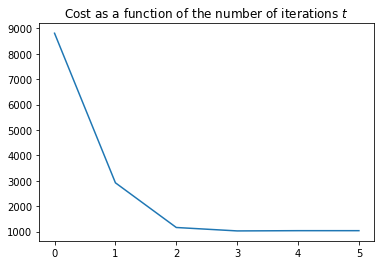

In [0]:
X, _ = generator()
X_clusters, cost_list, C = cost_three_means(X, epsilon = 10**(-6))

plt.plot(cost_list)
plt.title("Cost as a function of the number of iterations $t$")
plt.show()

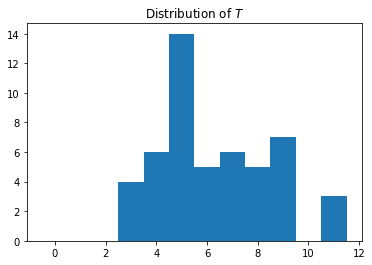

In [0]:
nb_tests = 50
iterations = np.zeros(nb_tests)

for j in range(nb_tests):
  X, _ = generator()
  X_clusters, cost_list, C = cost_three_means(X, epsilon = 10**(-6))
  iterations[j] = len(cost_list)
bins = np.arange(0, np.max(iterations) + 1.5) - 0.5
plt.hist(iterations, bins)
plt.title("Distribution of $T$")
plt.show()

b) We now use the same algorithm using the median instead of the mean.

In [0]:
def cost_three_medians(X, epsilon=10**(-3)):
  n, p = X.shape
  
  [r1, r2, r3] = sample(range(n),3) # random index in each set
  C = [X[r1], X[r2], X[r3]] # the centroids are random elements of each set
  C = np.asarray(C)
  cost = 0
  previous_cost = epsilon + 1
  cost_list = []

  while abs(previous_cost - cost) > epsilon:
    X_clusters = [[], [], []]

    previous_cost = cost
    cost = 0

    for x in X:
      index = np.argmin(np.linalg.norm(x - C, 2, axis=-1)**2)
      X_clusters[index].append(x)

    for i in range(len(X_clusters)):
      cluster_array = np.array(X_clusters[i])
      C[i] = np.median(cluster_array, axis = 0)
      cost += np.linalg.norm(cluster_array - C[i], 1)**2
    cost_list.append(cost)

  return X_clusters, cost_list, C

We want to plot the associated **cost function**, and study its convergence for a certain stopping criterion, defined by a precision threshold $\epsilon$.

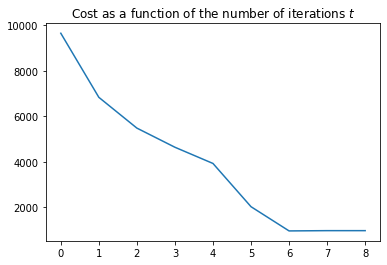

In [0]:
X, _ = generator()
X_clusters, cost_list, C = cost_three_medians(X, epsilon = 10**(-6))

plt.plot(cost_list)
plt.title("Cost as a function of the number of iterations $t$")
plt.show()

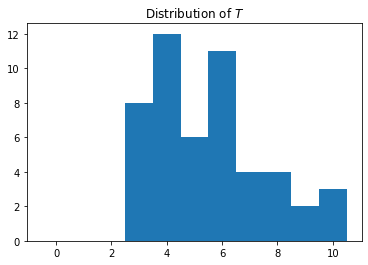

In [0]:
nb_tests = 50
iterations = np.zeros(nb_tests)

for j in range(nb_tests):
  X, _ = generator()
  X_clusters, cost_list, C = cost_three_medians(X, epsilon = 10**(-6))
  iterations[j] = len(cost_list)
bins = np.arange(0, np.max(iterations) + 1.5) - 0.5
plt.hist(iterations, bins)
plt.title("Distribution of $T$")
plt.show()

We can then see that it converges on average a bit faster with the medians than with the means.

c) 
Let $c$ be the cost function such that $c(y) = \sum_{k=1}^K c_k(y_k)$ where $c_k(y) = \sum_{i \in \mathcal{C}_k} ||x_i-y_k||_1 = \sum_{i \in \mathcal{C}_k} \sum_{j\in\{1,...,n\}} |x_{i,j}-y_{k,j}| = \sum_{i \in \mathcal{C}_k} \sum_{j\in\{1,...,n\}, x_{i,j}\neq y_{k,j}} |x_{i,j}-y_{k,j}|$ and $y = (y_1, y_2, ..., y_n) \in \mathbb{R}^n$ is the $K$-tuple of the $K$ centroids.

Let's now show that when we $c$ is minimized over $\mathbb{R}^n$, then $\forall k, y_k$ is the median of the cluster $k$

So, first, let's suppose that $c$ is minimized over $\mathbb{R}^n$. We can calculate the subdifferential of $c$ the sum of the $K$ subdifferential of $c_k$ and we have:

$\partial c(y) = \sum_{k=1}^K \partial c_k(y_k)$

But we know that 
$$sign(x)=
    \begin{cases}
      \{-1\}, & \text{if}\ x<0 \\
      [-1, 1], &\text{if}\ x = 0 \\
      \{1\}, & \text{if}\ x>0
    \end{cases}
    =    \begin{cases}
      \{\frac{x}{|x|}\}, & \text{if}\ x \neq 0 \\
      [-1, 1], &\text{otherwise}\
    \end{cases}$$

Therefore:

$\partial c(y) = \sum_{k=1}^K  \sum_{i \in \mathcal{C}_k} \sum_{j\in\{1,...,n\}, x_{i,j}\neq y_{k,j}} sign(x_{i,j}-y_{k,j}) = \sum_{k=1}^K  \sum_{i \in \mathcal{C}_k} \sum_{j\in\{1,...,n\}, x_{i,j}\neq y_{k,j}}  \frac{x_{i,j}-y_{k,j}}{|x_{i,j}-y_{k,j}|}$

But, according to **Fermat's rule**, $y$ is a minimizer of the convex function $c$ if and only if $0 \in \partial c(y)$.

Yet, one solution for that problem would be to take for all $k, y_k$ as the median of the set $\{x_i, i \in C_k\}$. Indeed, if for all $k$ and $j$, we have $y_{k,j}$ the median of the $j$-component of $C_k$, then $\sum_{j\in\{1,...,n\}, x_{i,j}\neq y_{k,j}}  \frac{x_{i,j}-y_{k,j}}{|x_{i,j}-y_{k,j}|} = 0$. 

Next, we get $\sum_{k=1}^K  \sum_{i \in \mathcal{C}_k} \sum_{j\in\{1,...,n\}, x_{i,j}\neq y_{k,j}}  \frac{x_{i,j}-y_{k,j}}{|x_{i,j}-y_{k,j}|} = 0$ and we get $0 \in \partial c(y)$. By an application of **Fermat's rule**, $y$, the $K$-tuple of the medians of the clusters is a minimizer of $c$.